In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [55]:
X_train = pd.read_csv("Downloads\DS Test\DS Test\Training\X_train.csv")
y_train = pd.read_csv("Downloads\DS Test\DS Test\Training\y_train.csv")


In [56]:
X_test = pd.read_csv("Downloads\DS Test\DS Test\Test\X_test.csv")

In [57]:
df = pd.merge(X_train, y_train, on = 'Unique_ID')

In [58]:
pd.set_option('display.max_columns', None)

In [59]:
df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35,Dependent_Variable
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,NaN,2.5,NaN,NaN,2.595,10.0,0,0,2.0,14.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0,1
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0,0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,NaN,2.4,NaN,NaN,2.495,17.0,2,15,7.0,3.0,19.0,NaN,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0,1
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0,0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,1.0,4.0,0.0,0.0,0.0,0.0,57532.0,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0,0


In [60]:
df.shape

(33050, 45)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33050 entries, 0 to 33049
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unique_ID           33050 non-null  object 
 1   C1                  33050 non-null  int64  
 2   C2                  33050 non-null  int64  
 3   C3                  33050 non-null  int64  
 4   C4                  33050 non-null  int64  
 5   C5                  33050 non-null  int64  
 6   C6                  33050 non-null  bool   
 7   C7                  33050 non-null  int64  
 8   C8                  33050 non-null  bool   
 9   N1                  33050 non-null  float64
 10  N2                  28438 non-null  float64
 11  N3                  32685 non-null  float64
 12  N4                  28444 non-null  float64
 13  N5                  28444 non-null  float64
 14  N6                  32685 non-null  float64
 15  N7                  32623 non-null  float64
 16  N8  

In [62]:
#Describing Numeric Data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
C1,33050.0,1.119818,0.399382,1.000,1.000000,1.000000,1.0000,3.000000e+00
C2,33050.0,2.403873,3.399024,0.000,0.000000,1.000000,3.0000,2.000000e+01
C3,33050.0,12.856097,12.013457,0.000,2.000000,10.000000,20.0000,5.100000e+01
C4,33050.0,14.437398,15.527474,0.000,1.000000,10.000000,26.0000,6.700000e+01
C5,33050.0,1.719395,1.320860,0.000,1.000000,2.000000,2.0000,7.000000e+00
C7,33050.0,3.124932,2.158905,0.000,1.000000,4.000000,4.0000,7.000000e+00
N1,33050.0,19.976530,8.110870,0.000,13.450000,19.275000,26.9000,4.800000e+01
N2,28438.0,81.342710,85.397795,0.000,21.000000,53.000000,112.0000,7.550000e+02
N3,32685.0,3.359361,0.411040,0.000,3.200000,3.400000,3.6000,4.400000e+00
N4,28444.0,9.574075,5.584756,0.000,6.000000,9.000000,13.0000,5.900000e+01


In [63]:
#Determining unique values in every column
df.nunique()

Unique_ID             33050
C1                        3
C2                       21
C3                       52
C4                       68
C5                        8
C6                        2
C7                        8
C8                        2
N1                     1985
N2                      504
N3                       26
N4                       51
N5                       46
N6                       26
N7                      108
N8                       44
N9                     2091
N10                      42
N10.1                    46
N11                      90
N12                    3288
N14                      96
N15                      19
N16                       6
N17                   16615
N18                     183
N19                   14098
N20                      94
N21                      97
N22                      17
N23                     777
N24                    5722
N25                       7
N26                      95
N27                 

In [64]:
#Missing data analysis
df.isna().sum()/len(df)*100

Unique_ID              0.000000
C1                     0.000000
C2                     0.000000
C3                     0.000000
C4                     0.000000
C5                     0.000000
C6                     0.000000
C7                     0.000000
C8                     0.000000
N1                     0.000000
N2                    13.954614
N3                     1.104387
N4                    13.936460
N5                    13.936460
N6                     1.104387
N7                     1.291982
N8                     0.000000
N9                     0.000000
N10                    1.291982
N10.1                  1.291982
N11                    2.166415
N12                   13.960666
N14                    1.839637
N15                    1.291982
N16                   13.936460
N17                   13.936460
N18                   13.936460
N19                   13.830560
N20                   13.830560
N21                   13.830560
N22                   13.830560
N23     

In [65]:
#Duplicate values check
if df.shape[0] == df.drop_duplicates().shape[0] :
    print('No duplicates Found')
else:
    duplicates = df.shape[0] - df.drop_duplicates().shape[0]
    print('{} duplicates found'.format(duplicates))

No duplicates Found


In [66]:
#Univariate Analysis
#Function for Univariate Analysis
def univariate_plot(x,y):
    fig = plt.figure(figsize=(12,5)) #Setting the figure size
    ax = fig.add_subplot(121)
    sns.histplot(x,kde=True,color='darkgreen',ax=ax) #Histogram
    ax.axvline(x.mean())
    ax2 = fig.add_subplot(122)
    sns.boxplot(x = x,data=df,color='darkgreen',ax=ax2) #Boxplot
    ax.set_title("Histogram of " + y) #Setting the title of first axis
    ax2.set_title("Boxplot of "+y) # Setting the title of second axis
    sns.set(style='white')
    fig.set_facecolor("lightgray") #Beautifying
    plt.grid() #Plotting the grid
    plt.show()

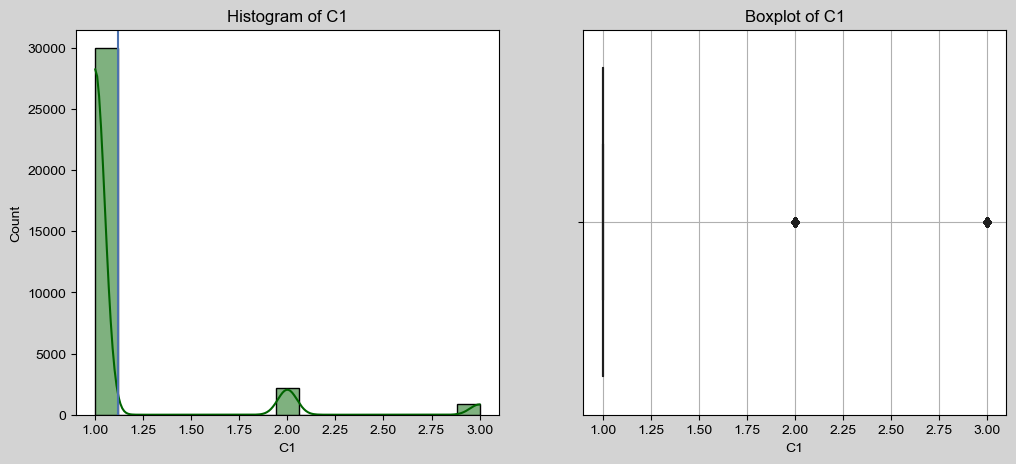

None


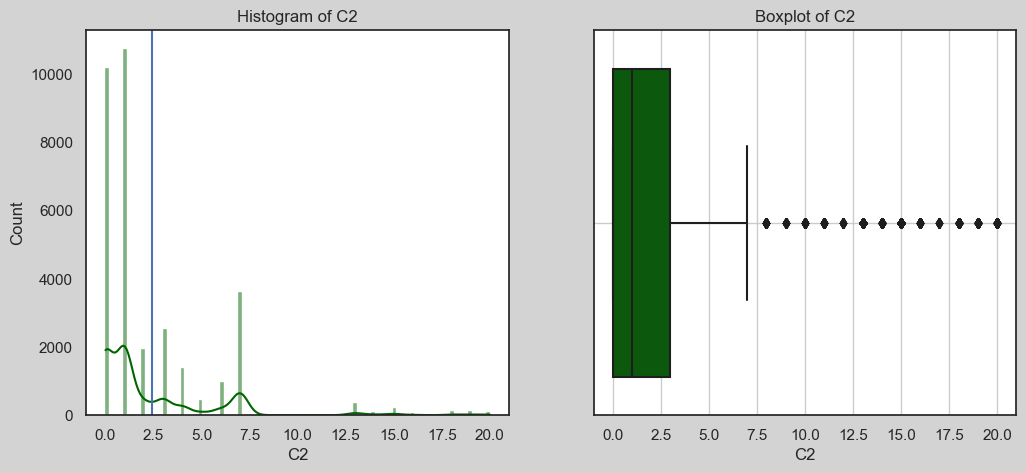

None


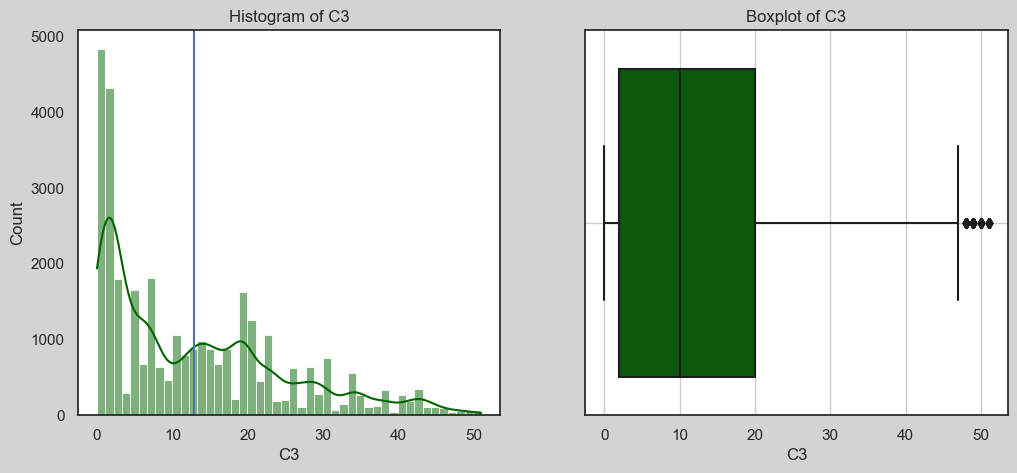

None


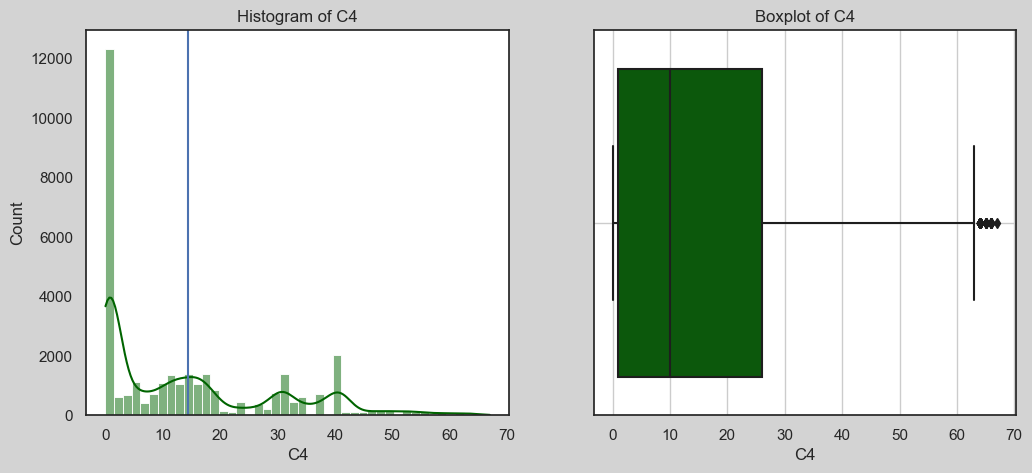

None


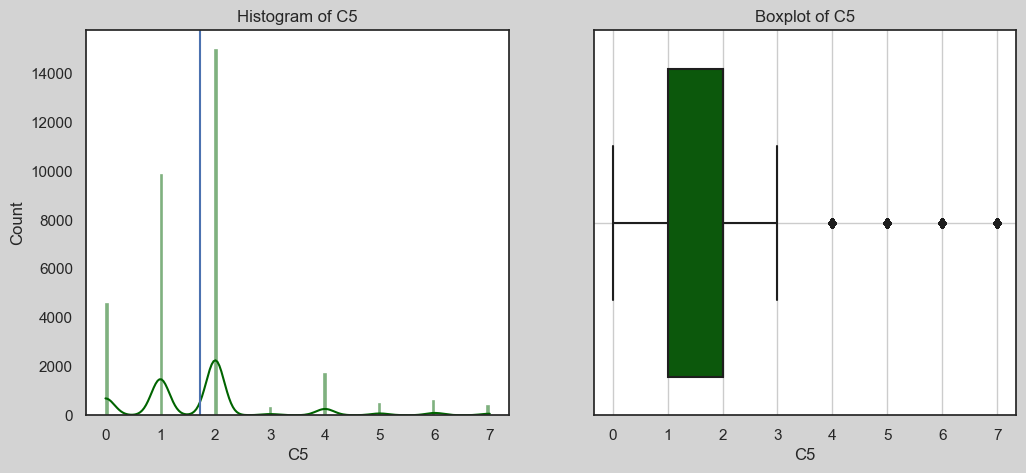

None


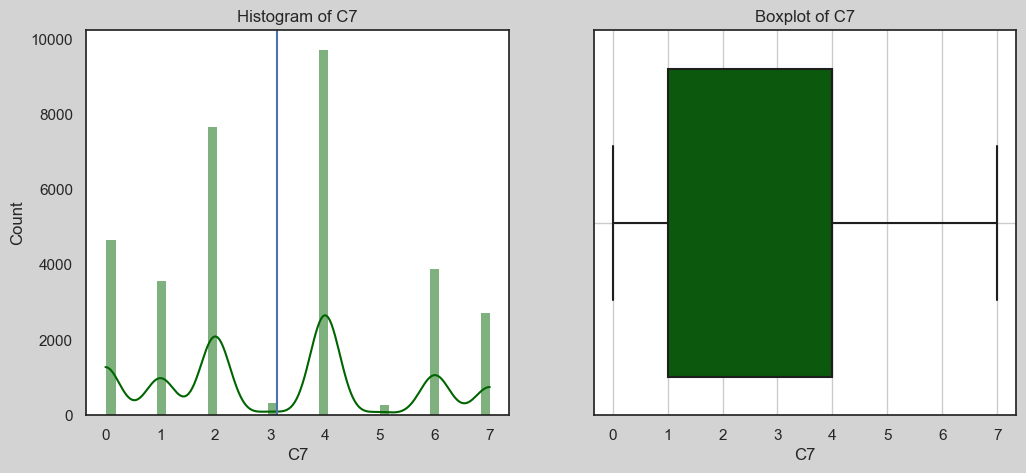

None


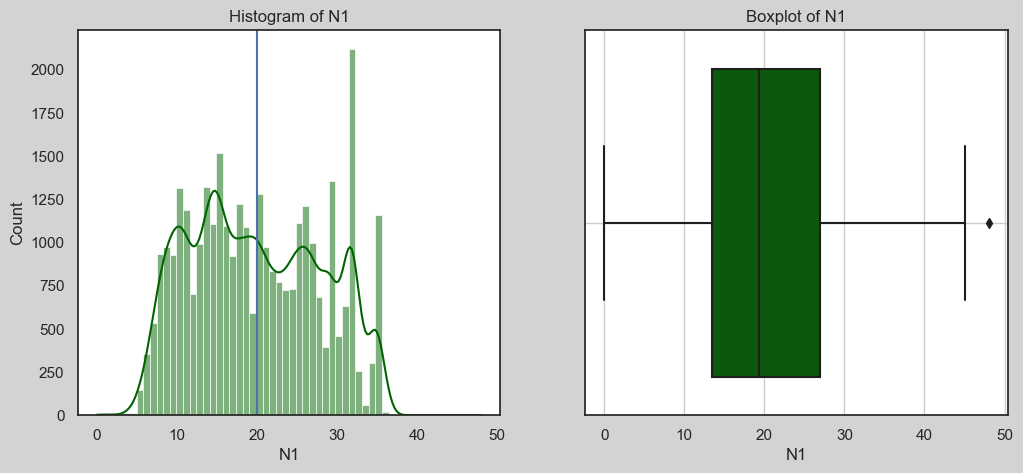

None


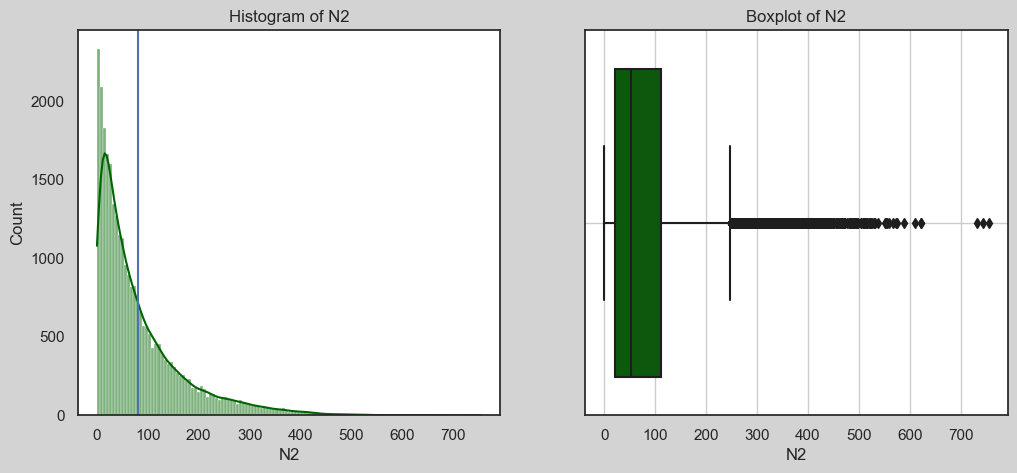

None


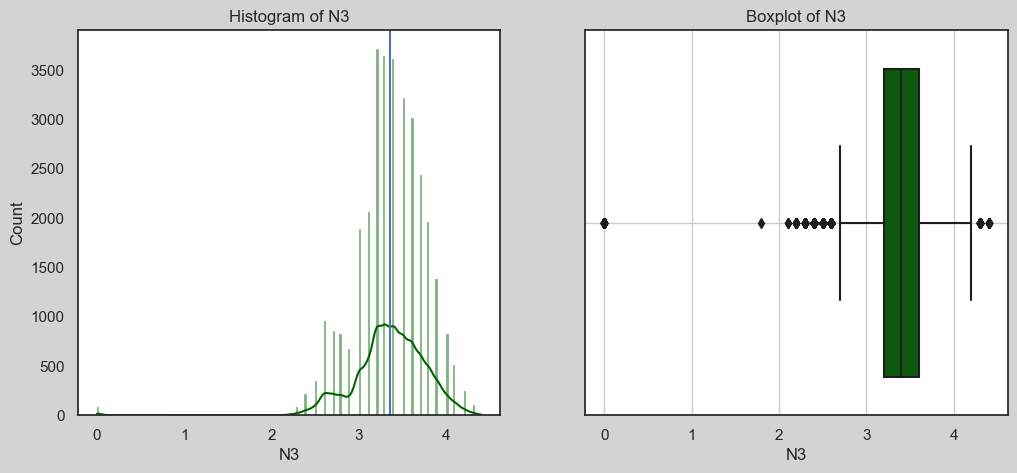

None


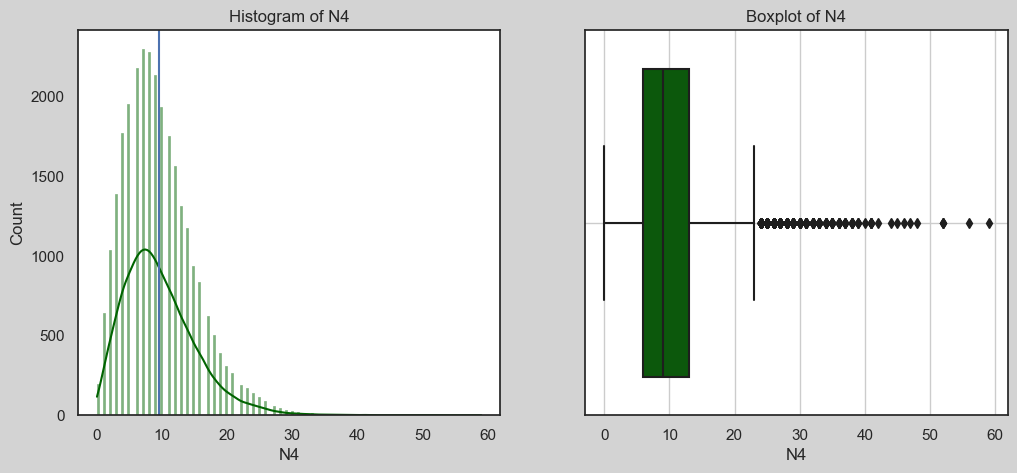

None


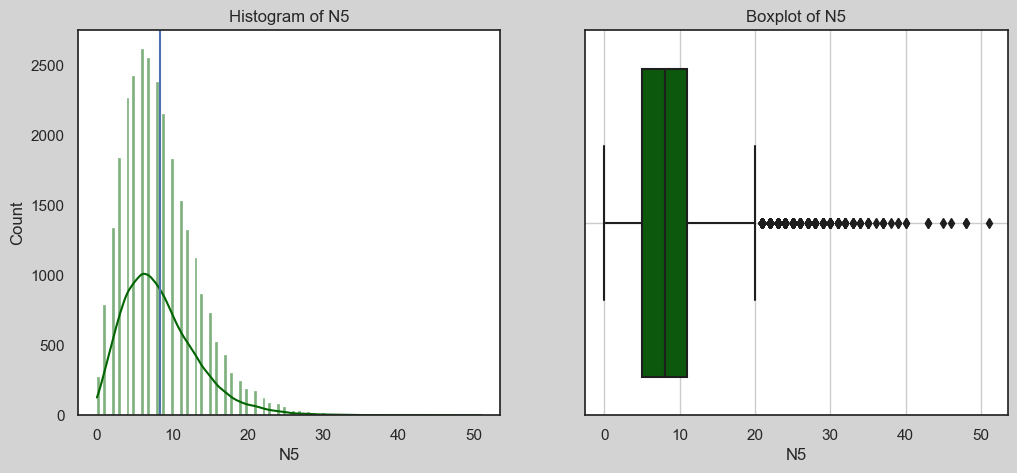

None


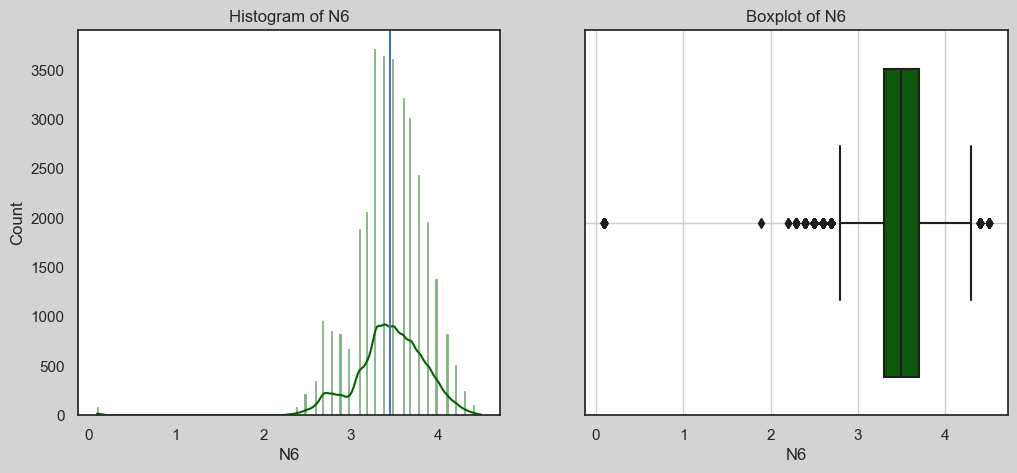

None


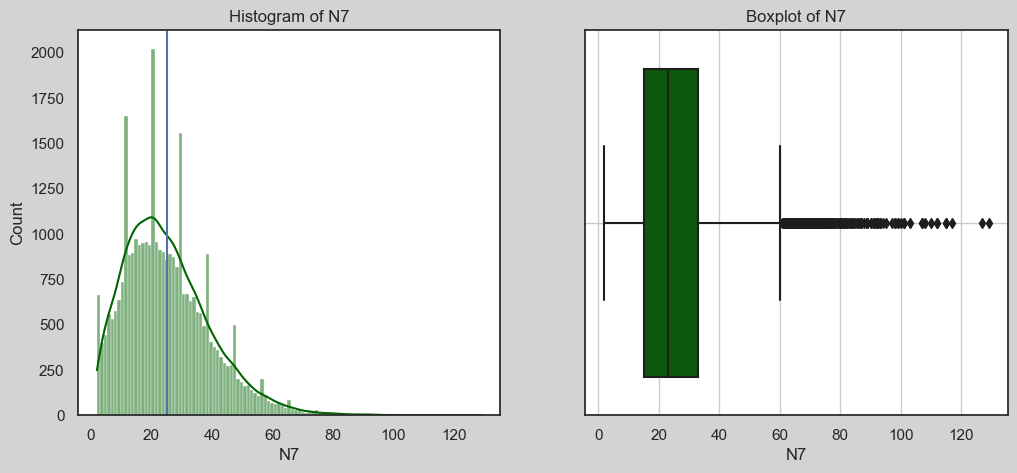

None


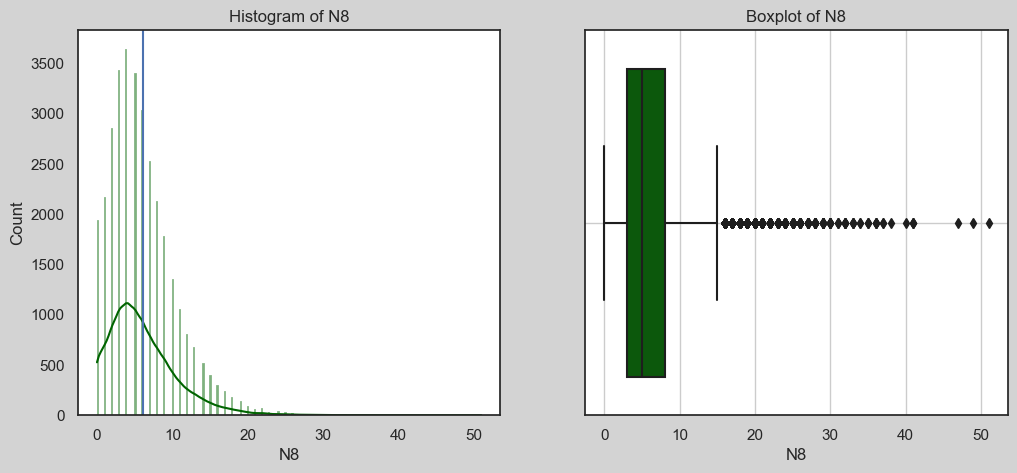

None


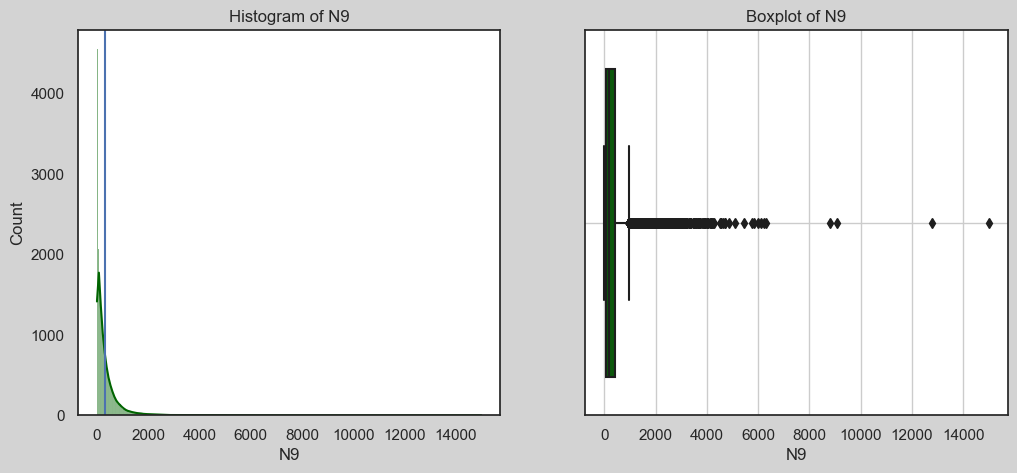

None


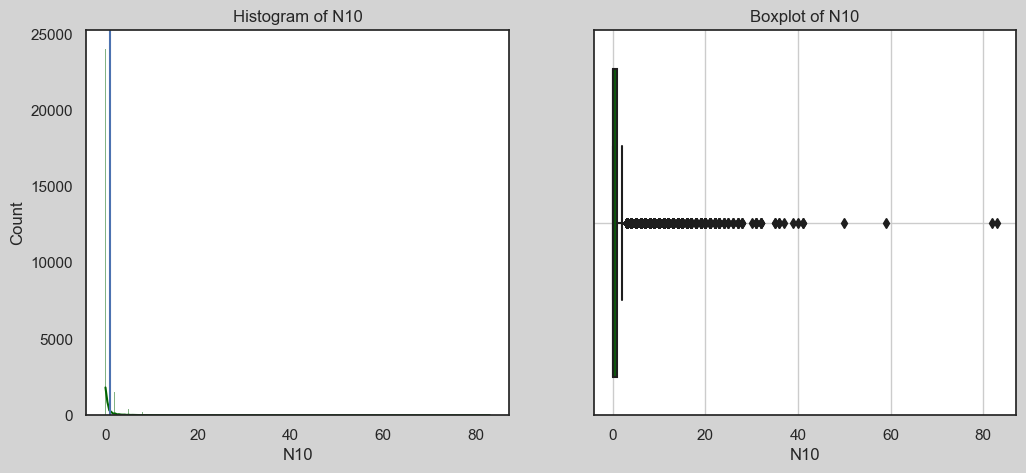

None


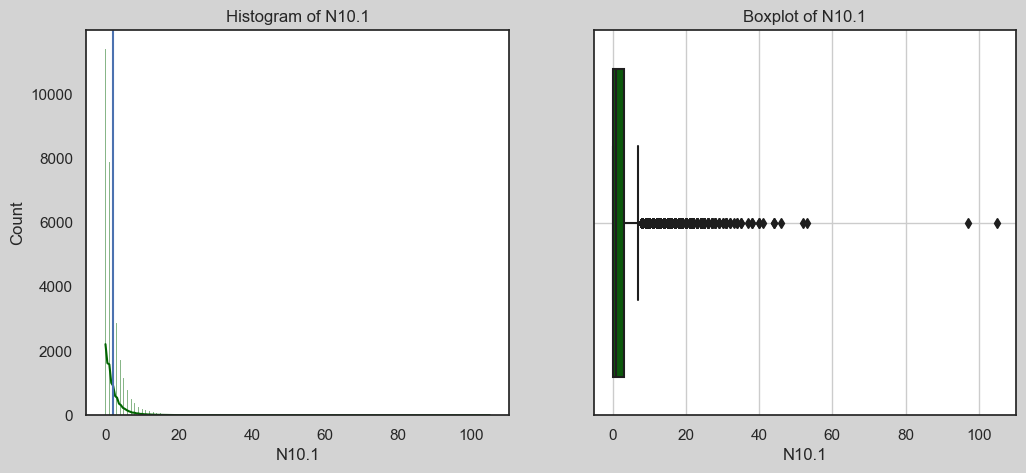

None


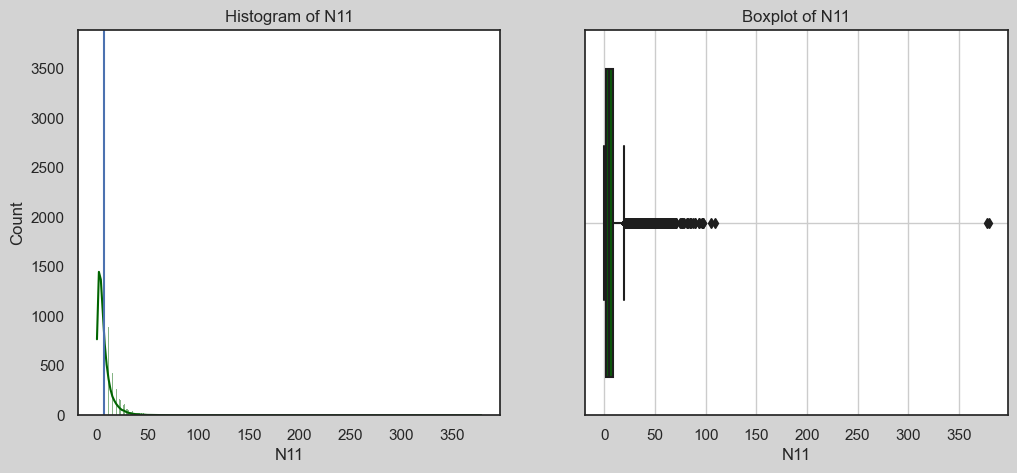

None


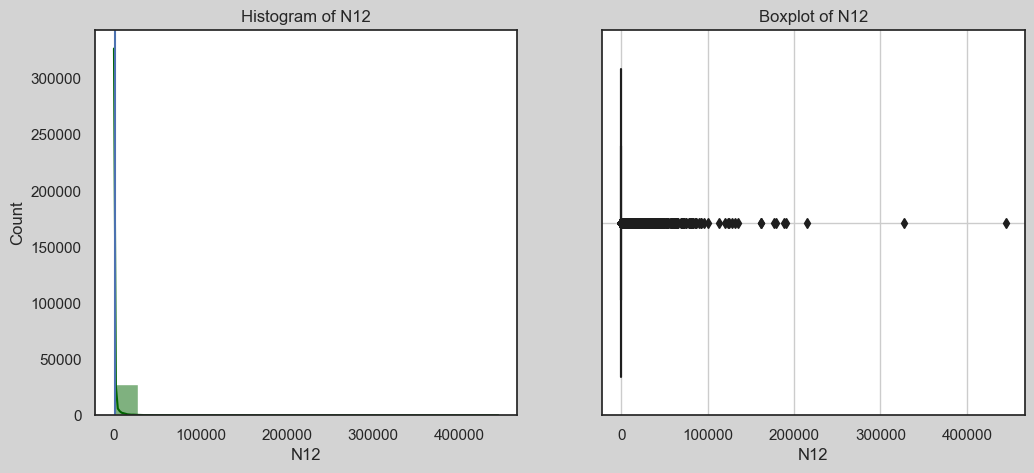

None


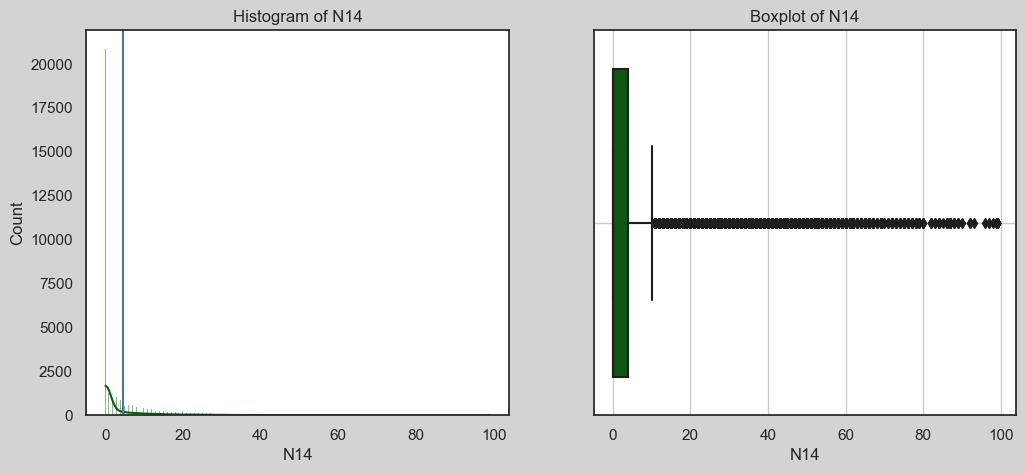

None


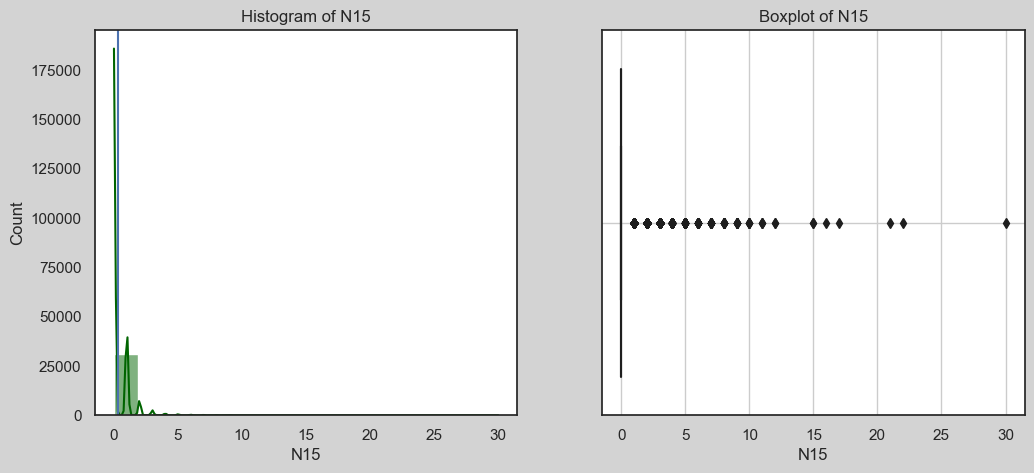

None


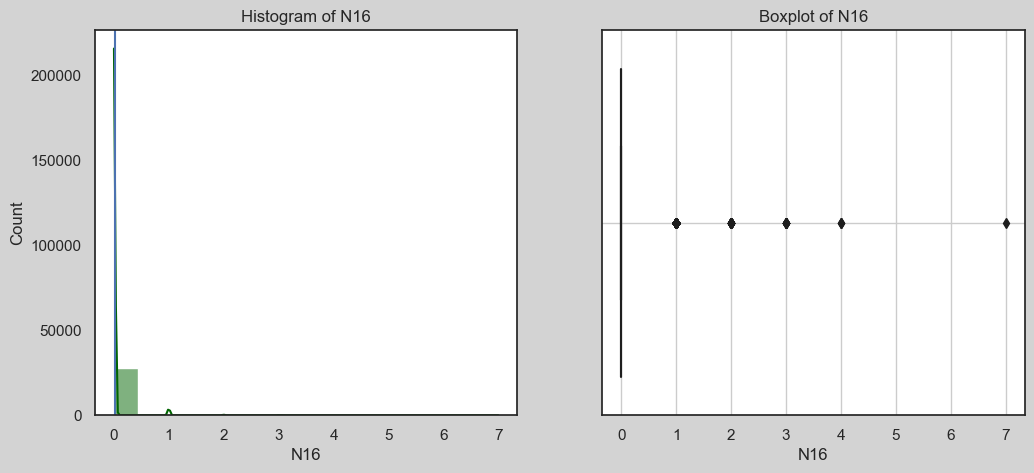

None


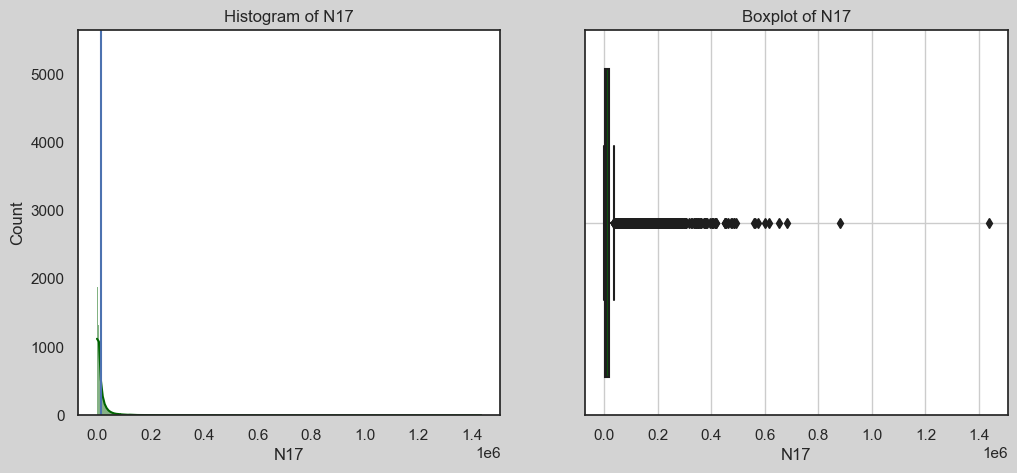

None


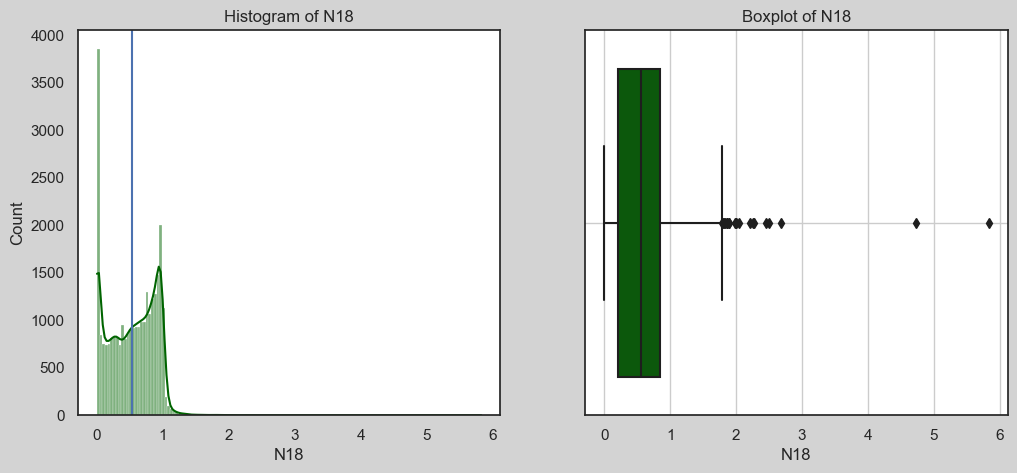

None


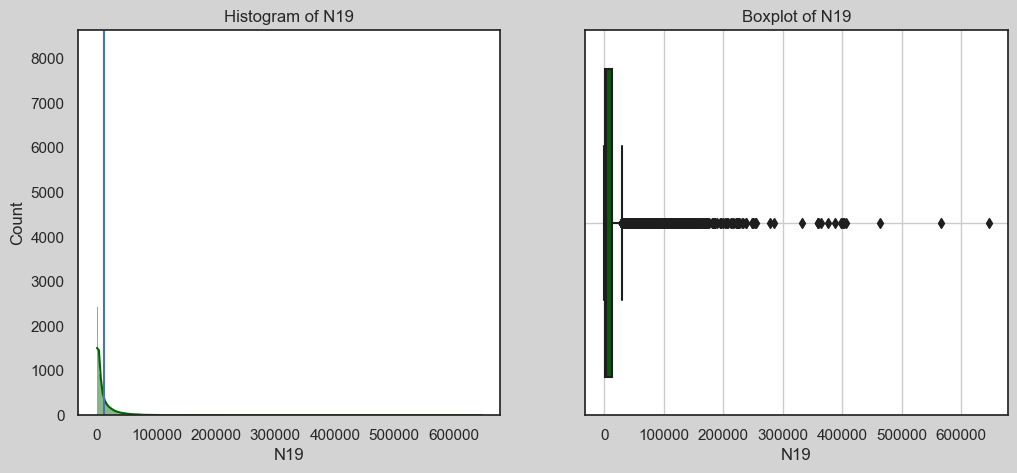

None


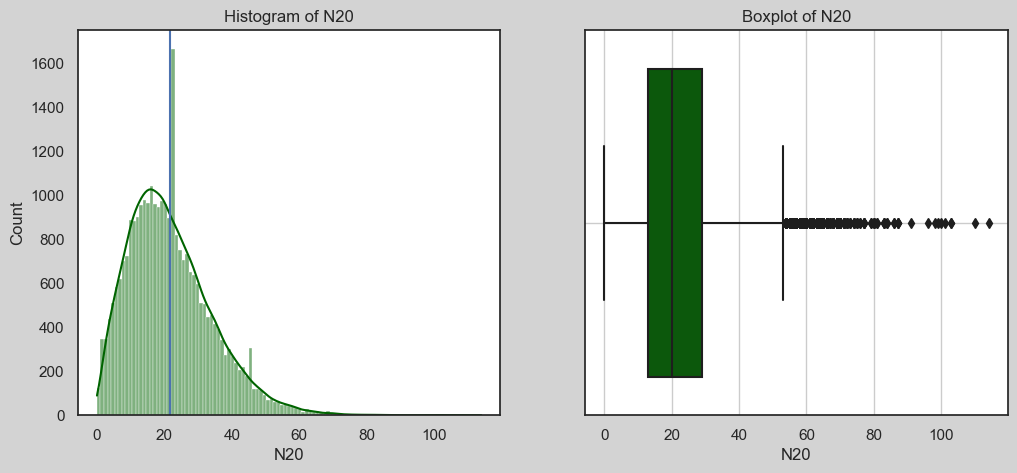

None


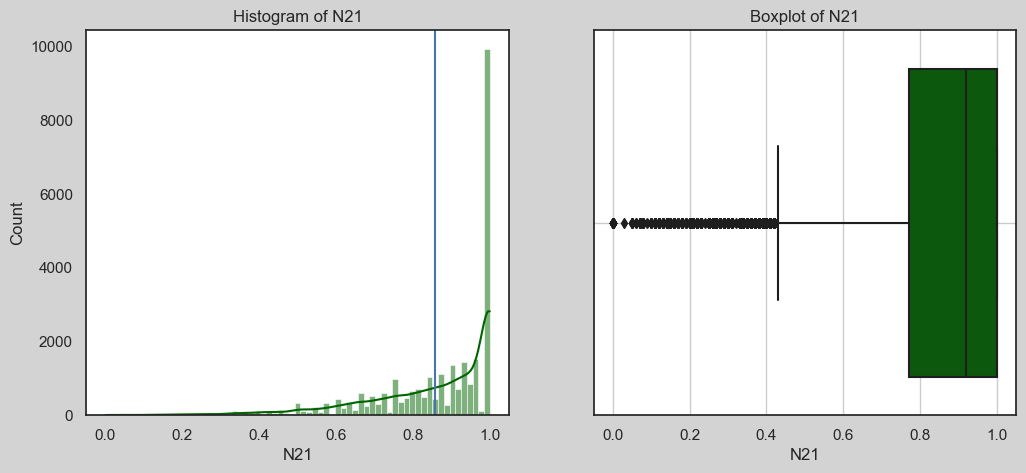

None


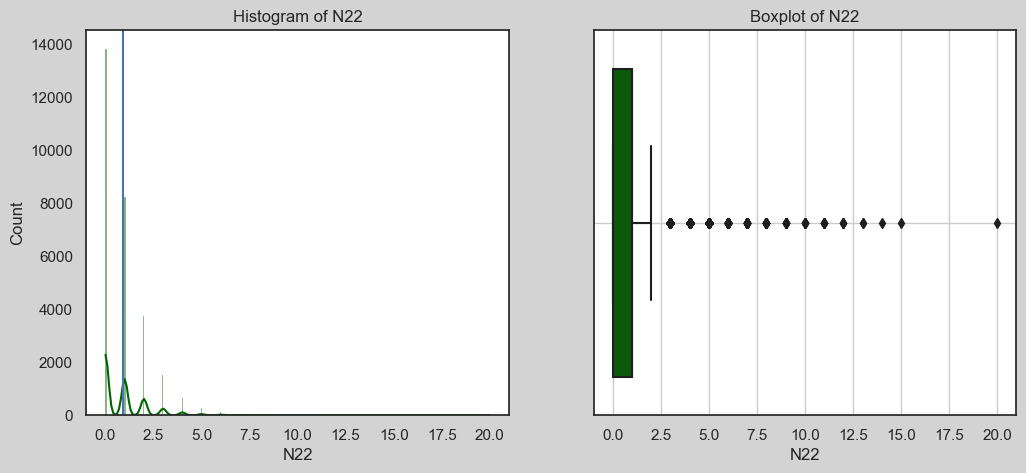

None


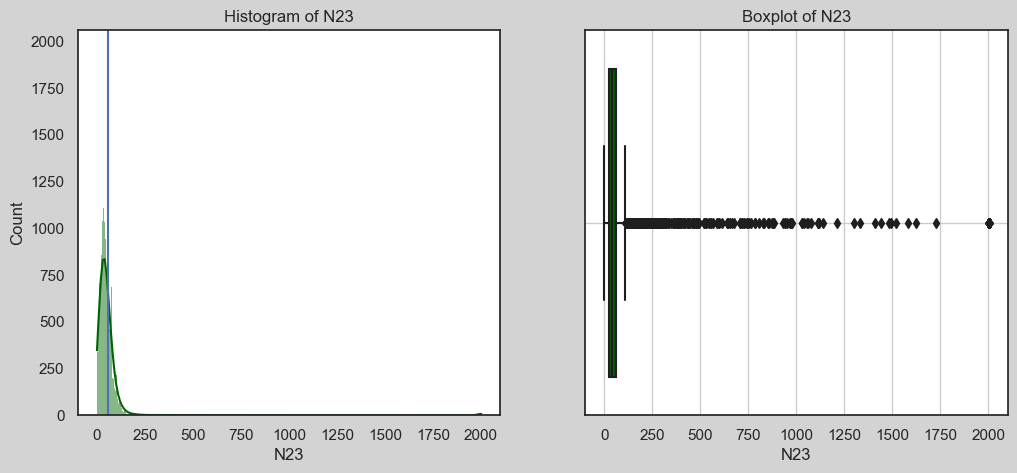

None


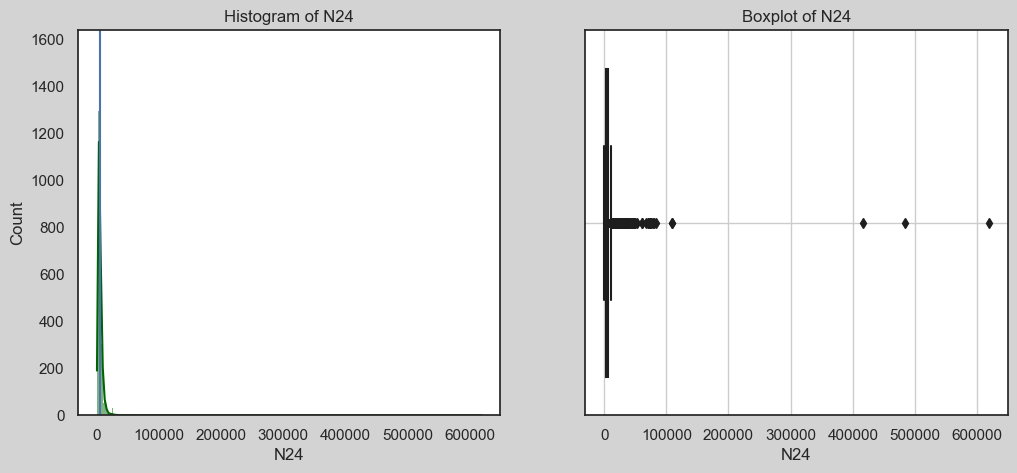

None


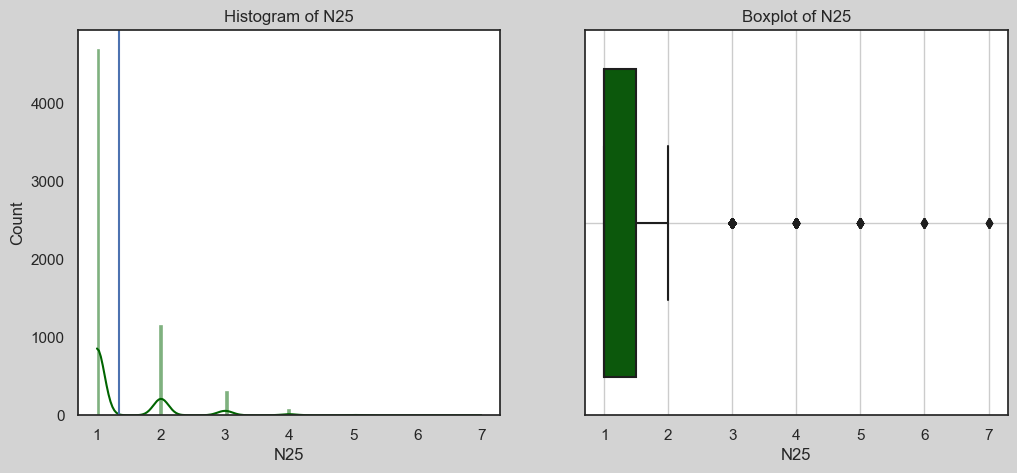

None


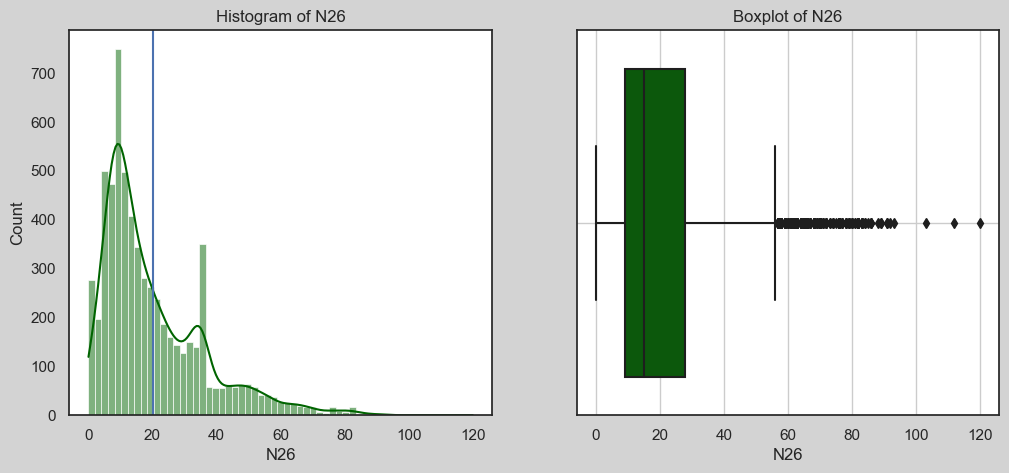

None


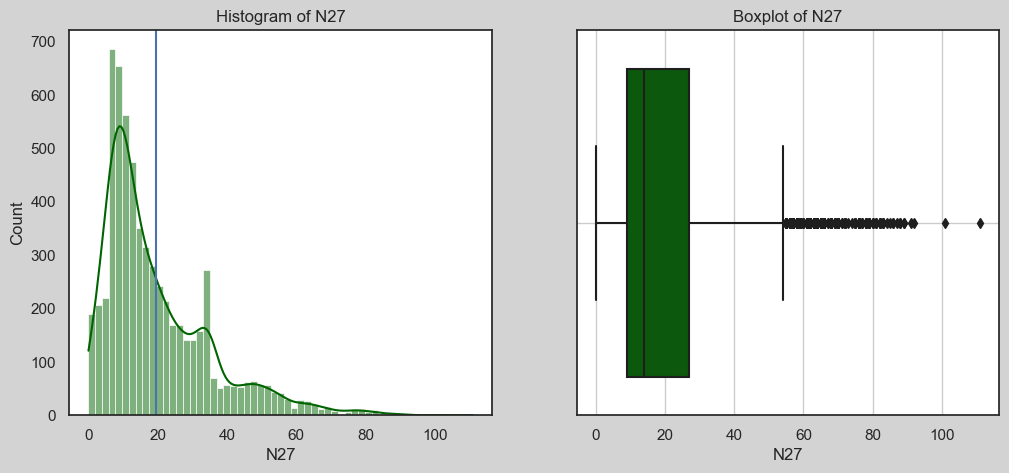

None


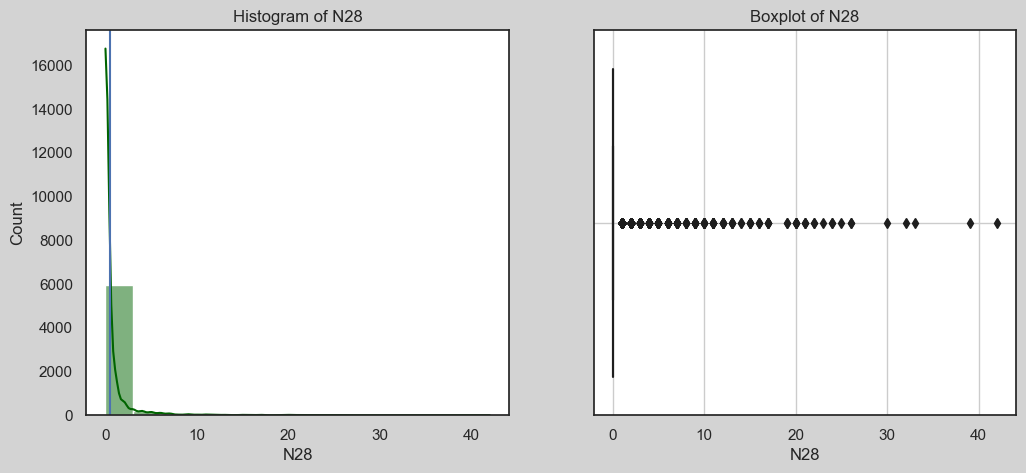

None


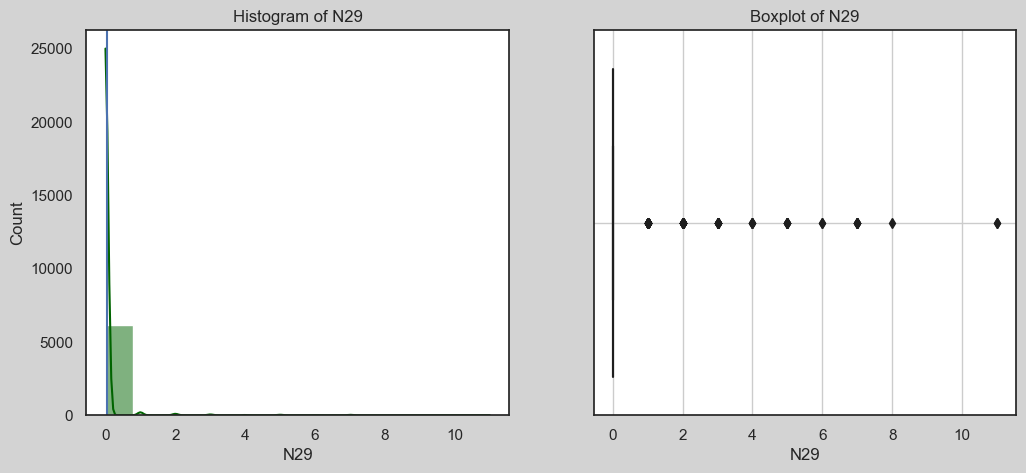

None


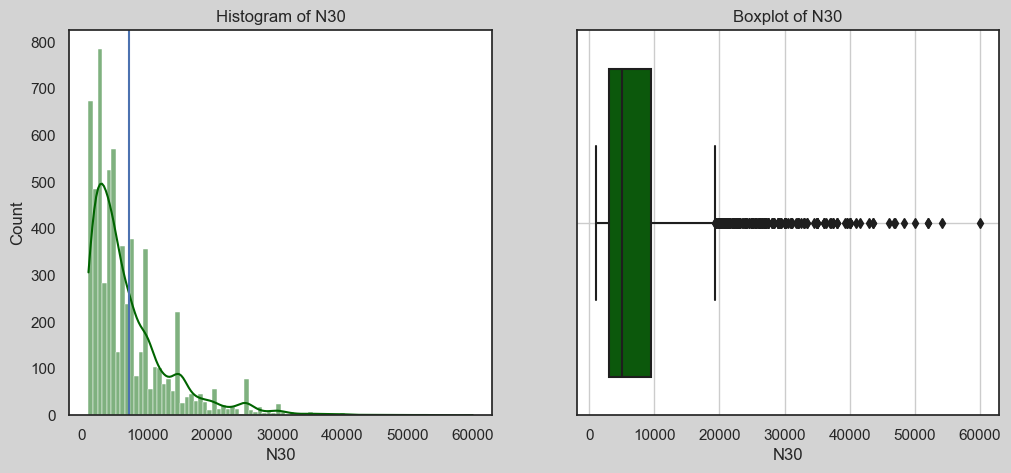

None


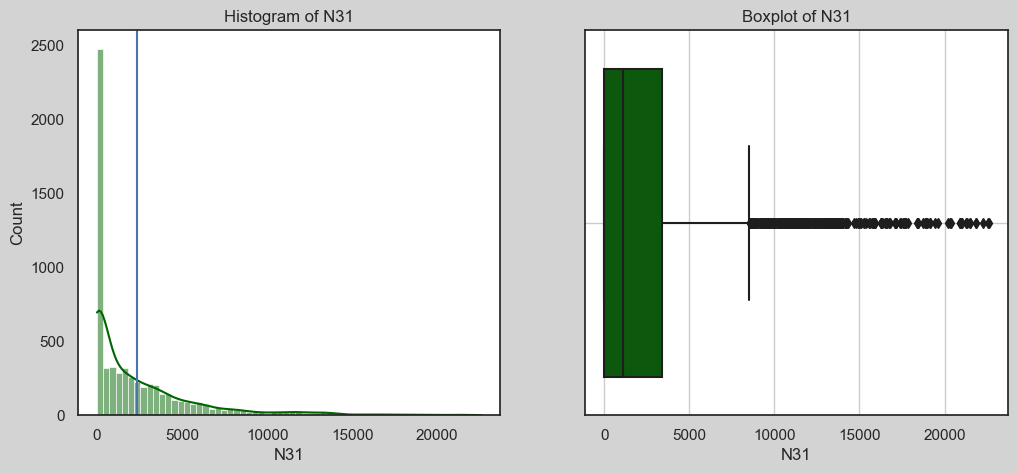

None


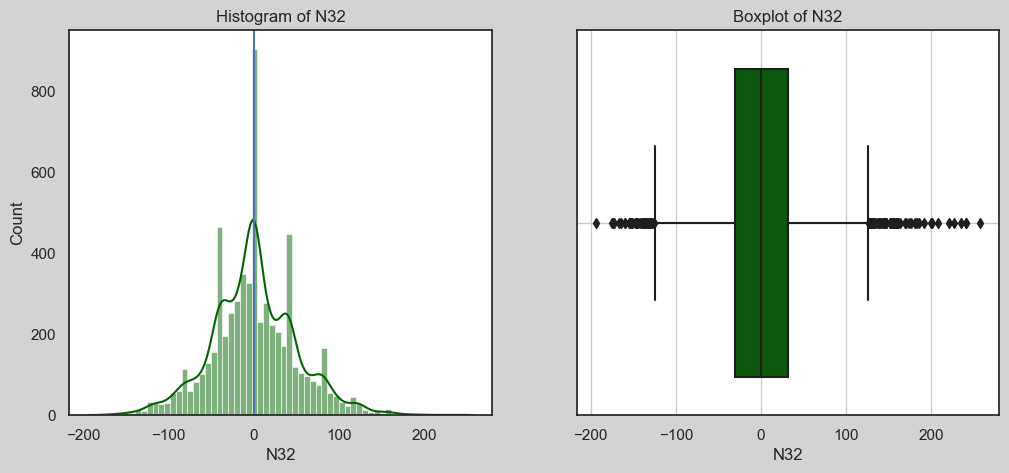

None


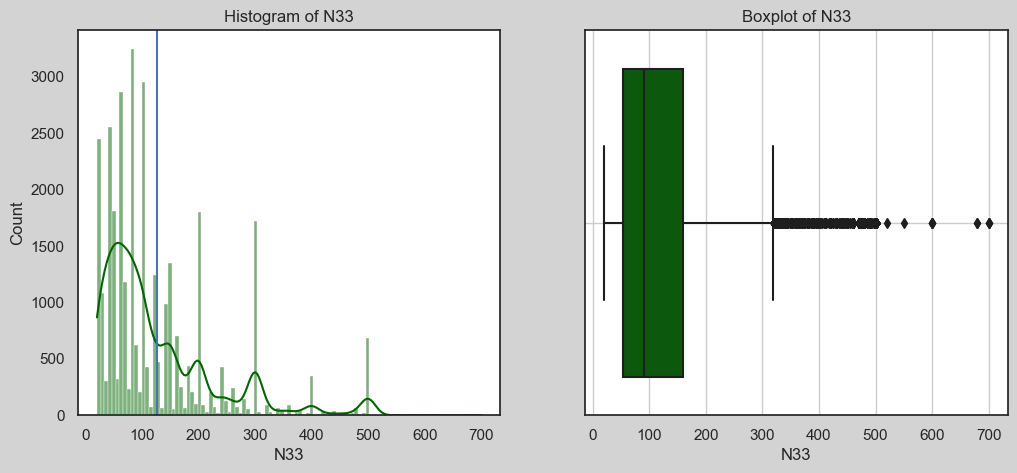

None


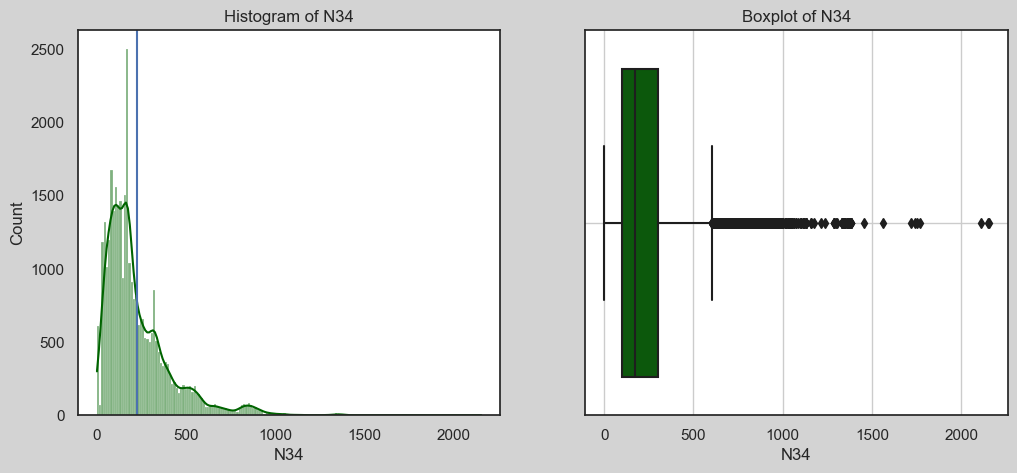

None


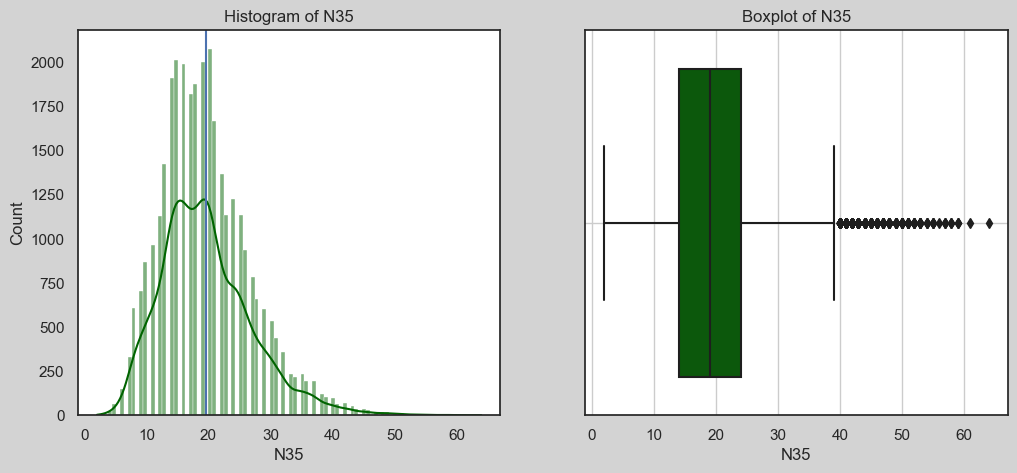

None


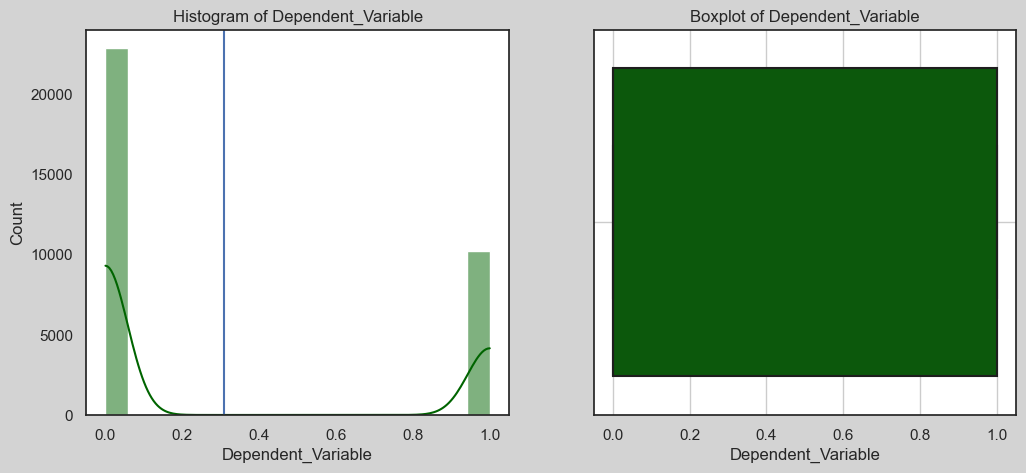

None


In [13]:
for i in list(df.select_dtypes(include=["number"]).columns):
    print(univariate_plot(df[i],str(i)))

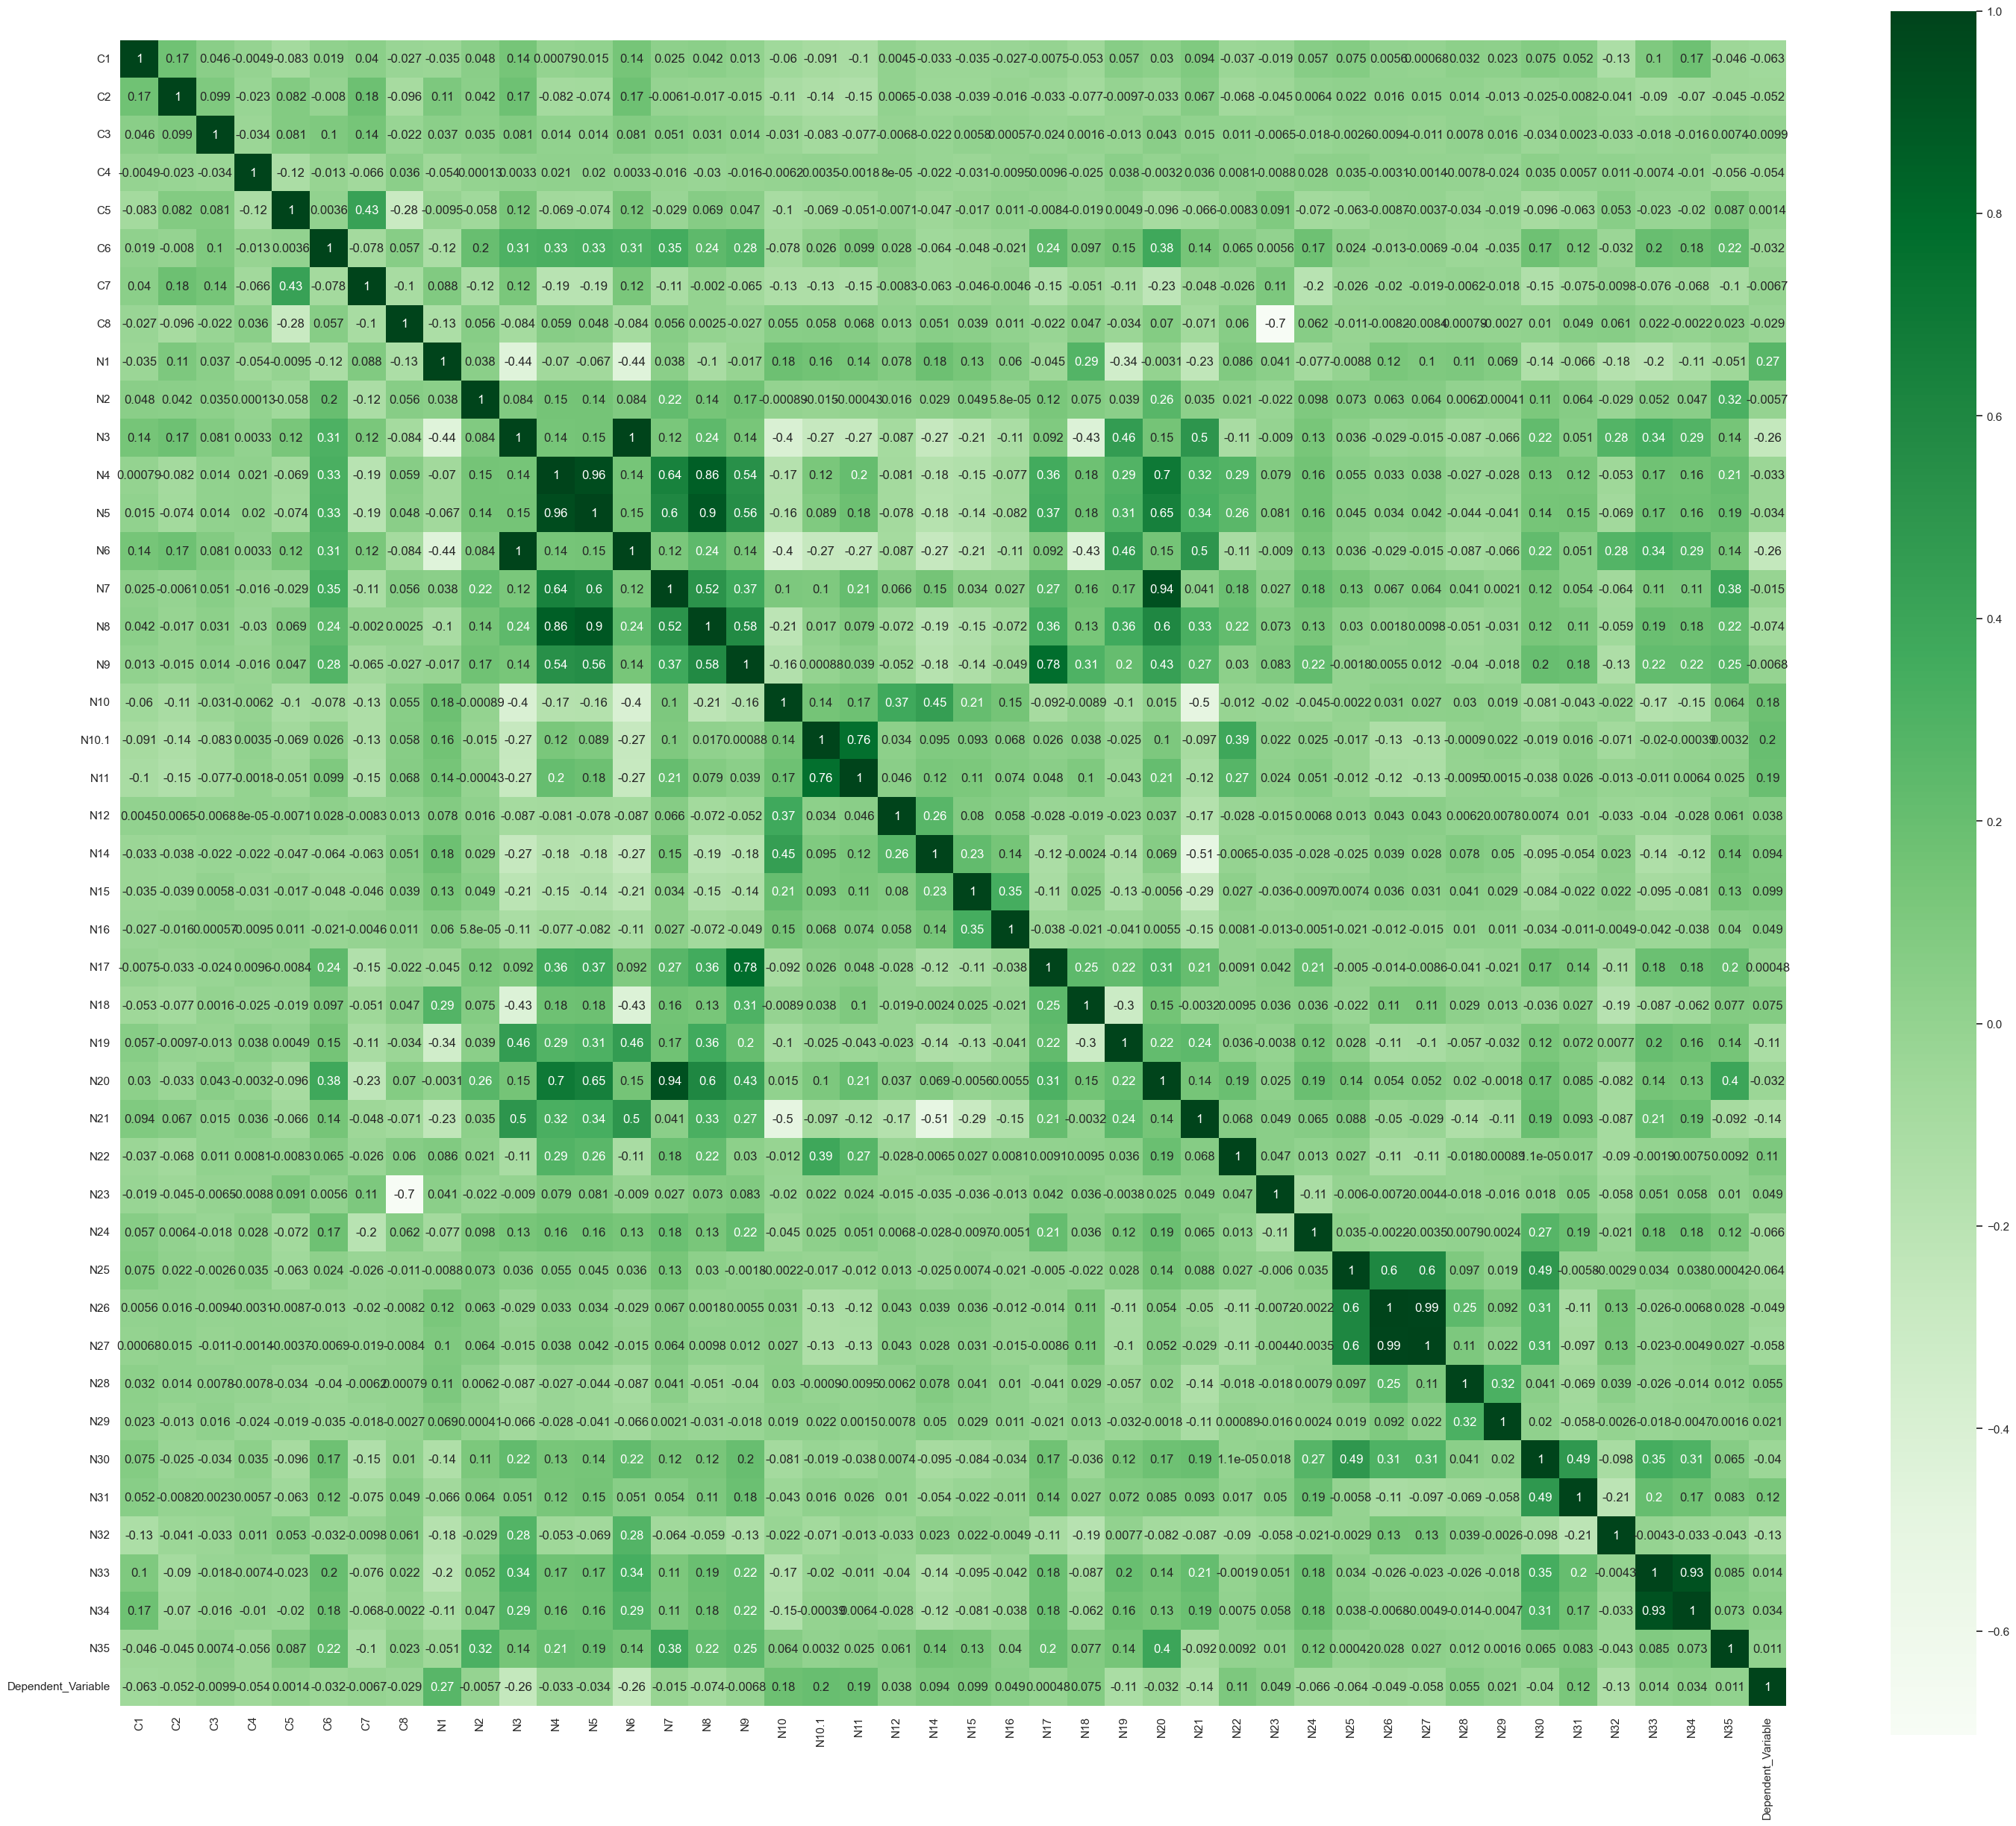

In [14]:
import seaborn as sns
plt.figure(figsize = (36, 30))
ax = sns.heatmap(df.corr(),annot=True,cmap='Greens',square=True)

In [67]:
df.drop('Unique_ID',inplace=True,axis=1)

In [68]:
df.shape

(33050, 44)

In [69]:
df_logistic = df.drop(['N3','N4','N5','N7','N26','N33','N17'],axis=1)

In [70]:
#Missing data analysis
df.isna().sum()/len(df)*100

C1                     0.000000
C2                     0.000000
C3                     0.000000
C4                     0.000000
C5                     0.000000
C6                     0.000000
C7                     0.000000
C8                     0.000000
N1                     0.000000
N2                    13.954614
N3                     1.104387
N4                    13.936460
N5                    13.936460
N6                     1.104387
N7                     1.291982
N8                     0.000000
N9                     0.000000
N10                    1.291982
N10.1                  1.291982
N11                    2.166415
N12                   13.960666
N14                    1.839637
N15                    1.291982
N16                   13.936460
N17                   13.936460
N18                   13.936460
N19                   13.830560
N20                   13.830560
N21                   13.830560
N22                   13.830560
N23                    7.521936
N24     

In [4]:
def plot_outliers_side_by_side(df1, df2, columns):
    fig, axs = plt.subplots(len(columns), 2, figsize=(12, 6 * len(columns)))

    for i, col in enumerate(columns):
        axs[i, 0].scatter(range(len(df1)), df1[col], s=5, color='blue')
        axs[i, 0].set_xlabel('Index')
        axs[i, 0].set_ylabel(col)
        axs[i, 0].set_title(f'Scatter Plot: {col} - DataFrame 1')

        axs[i, 1].scatter(range(len(df2)), df2[col], s=5, color='red')
        axs[i, 1].set_xlabel('Index')
        axs[i, 1].set_ylabel(col)
        axs[i, 1].set_title(f'Scatter Plot: {col} - DataFrame 2')

    plt.tight_layout()
    plt.show()

### Encoding Boolean Values to Binary

In [71]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['C6','C8'])
df_encoded = encoder.fit_transform(df)
encoder = ce.BinaryEncoder(cols=['C6','C8'])
df_logistic_encoded = encoder.fit_transform(df)

In [72]:
df_encoded.head()

,C1,C2,C3,C4,C5,C6_0,C6_1,C7,C8_0,C8_1,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35,Dependent_Variable
0,1,0,11,31,0,0,1,0,0,1,23.75,NaN,2.5,NaN,NaN,2.595,10.0,0,0,2.0,14.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0,1
1,1,4,2,66,2,0,1,1,0,1,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0,0
2,1,0,19,2,0,0,1,0,0,1,29.00,NaN,2.4,NaN,NaN,2.495,17.0,2,15,7.0,3.0,19.0,NaN,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0,1
3,1,1,16,47,1,0,1,4,0,1,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0,0
4,1,1,13,1,1,1,0,6,0,1,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,1.0,4.0,0.0,0.0,0.0,0.0,57532.0,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0,0


In [73]:
df_logistic_encoded.head()

,C1,C2,C3,C4,C5,C6_0,C6_1,C7,C8_0,C8_1,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35,Dependent_Variable
0,1,0,11,31,0,0,1,0,0,1,23.75,NaN,2.5,NaN,NaN,2.595,10.0,0,0,2.0,14.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0,1
1,1,4,2,66,2,0,1,1,0,1,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0,0
2,1,0,19,2,0,0,1,0,0,1,29.00,NaN,2.4,NaN,NaN,2.495,17.0,2,15,7.0,3.0,19.0,NaN,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0,1
3,1,1,16,47,1,0,1,4,0,1,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0,0
4,1,1,13,1,1,1,0,6,0,1,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,1.0,4.0,0.0,0.0,0.0,0.0,57532.0,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0,0


In [74]:
X = df_logistic_encoded.drop('Dependent_Variable',axis=1)
y = df_logistic_encoded['Dependent_Variable']

from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1221)

### Binning

In [1]:
def extract_features_with_binning(dataframe, columns, bin_count):
    feature_dataframe = dataframe.copy()

    for col in columns:
        z_scores = (dataframe[col] - dataframe[col].mean()) / dataframe[col].std()  # Calculate Z-scores
        outliers = z_scores.abs() > 3  #threshold for identifying outliers

        # Create a new feature using binning
        feature_dataframe[col + '_bin'] = pd.qcut(dataframe[col], bin_count, duplicates='drop')

        # Replace outliers with NaN in the new feature
        feature_dataframe.loc[outliers, col + '_bin'] = pd.NA

    return feature_dataframe

### Winsorization

In [2]:
def winsorize_outliers(dataframe, limits):
    winsorized_dataframe = dataframe.copy()
    
    for col in dataframe.columns:
        col_data = dataframe[col].values
        winsorized_col = mstats.winsorize(col_data, limits=limits)  #Winsorizing
        winsorized_dataframe[col] = winsorized_col  # Replace column with winsorized values
    
    return winsorized_dataframe

### Trimming_Outliers

In [3]:
def trim_outliers(dataframe, trim_percentage):
    trimmed_dataframe = dataframe.copy()
    
    for col in dataframe.columns:
        col_data = dataframe[col].values
        trimmed_mean = trim_mean(col_data, trim_percentage)  # Calculate trimmed mean
        trimmed_dataframe[col] = col_data.clip(trimmed_mean)  # Replace outliers with trimmed mean
    
    return trimmed_dataframe

# Imputation with Median to fill missing value is less than 50%

In [75]:
def fill_missing(dataframe):
    missing_percent = dataframe.isnull().sum() / len(dataframe)
    columns_to_fill = missing_percent[missing_percent < 0.5].index

    for col in columns_to_fill:
        median_value = dataframe[col].median()
        dataframe[col].fillna(median_value, inplace=True)

    return dataframe

In [76]:
X_train = fill_missing(X_train)
X_cv = fill_missing(X_cv)

In [77]:
#Missing data analysis
X_train.isna().sum()/len(X_train)*100

C1        0.000000
C2        0.000000
C3        0.000000
C4        0.000000
C5        0.000000
C6_0      0.000000
C6_1      0.000000
C7        0.000000
C8_0      0.000000
C8_1      0.000000
N1        0.000000
N2        0.000000
N3        0.000000
N4        0.000000
N5        0.000000
N6        0.000000
N7        0.000000
N8        0.000000
N9        0.000000
N10       0.000000
N10.1     0.000000
N11       0.000000
N12       0.000000
N14       0.000000
N15       0.000000
N16       0.000000
N17       0.000000
N18       0.000000
N19       0.000000
N20       0.000000
N21       0.000000
N22       0.000000
N23       0.000000
N24       0.000000
N25      80.834234
N26      80.834234
N27      80.834234
N28      80.834234
N29      80.834234
N30      80.834234
N31      80.834234
N32      80.972552
N33       0.000000
N34       0.000000
N35       0.000000
dtype: float64

# Imputation with MICE to fill missing value is more than 60%

In [78]:
from fancyimpute import IterativeImputer

def fill_missing_with_mice(dataframe):

    missing_percent = dataframe.isnull().sum() / len(dataframe)
    columns_to_fill = missing_percent[missing_percent > 0.6].index
    dataframe_to_impute = dataframe[columns_to_fill]
    array_to_impute = dataframe_to_impute.values
    imputer = IterativeImputer()
    imputed_array = imputer.fit_transform(array_to_impute)
    dataframe[columns_to_fill] = imputed_array
    
    return dataframe

In [79]:
X_train_fill = fill_missing_with_mice(X_train)
X_cv_fill = fill_missing_with_mice(X_cv)

In [80]:
#Missing data analysis
X_train_fill.isna().sum()/len(X_train_fill)*100

C1       0.0
C2       0.0
C3       0.0
C4       0.0
C5       0.0
C6_0     0.0
C6_1     0.0
C7       0.0
C8_0     0.0
C8_1     0.0
N1       0.0
N2       0.0
N3       0.0
N4       0.0
N5       0.0
N6       0.0
N7       0.0
N8       0.0
N9       0.0
N10      0.0
N10.1    0.0
N11      0.0
N12      0.0
N14      0.0
N15      0.0
N16      0.0
N17      0.0
N18      0.0
N19      0.0
N20      0.0
N21      0.0
N22      0.0
N23      0.0
N24      0.0
N25      0.0
N26      0.0
N27      0.0
N28      0.0
N29      0.0
N30      0.0
N31      0.0
N32      0.0
N33      0.0
N34      0.0
N35      0.0
dtype: float64

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_train_pred_proba = logreg.predict_proba(X_train)[:, 1]
y_cv_pred_proba = logreg.predict_proba(X_cv)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred_proba)
cv_auc = roc_auc_score(y_cv, y_cv_pred_proba)

# Print the AUC scores
print("Training AUC:", train_auc)
print("Cross-validation AUC:", cv_auc)

Training AUC: 0.6389724859845831
Cross-validation AUC: 0.6378252676144419


# Processing on X

In [82]:
X = df_encoded.drop('Dependent_Variable',axis=1)
y = df_encoded['Dependent_Variable']

In [83]:
X = fill_missing(X)

In [84]:
X = fill_missing_with_mice(X)

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33050 entries, 0 to 33049
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      33050 non-null  int64  
 1   C2      33050 non-null  int64  
 2   C3      33050 non-null  int64  
 3   C4      33050 non-null  int64  
 4   C5      33050 non-null  int64  
 5   C6_0    33050 non-null  int64  
 6   C6_1    33050 non-null  int64  
 7   C7      33050 non-null  int64  
 8   C8_0    33050 non-null  int64  
 9   C8_1    33050 non-null  int64  
 10  N1      33050 non-null  float64
 11  N2      33050 non-null  float64
 12  N3      33050 non-null  float64
 13  N4      33050 non-null  float64
 14  N5      33050 non-null  float64
 15  N6      33050 non-null  float64
 16  N7      33050 non-null  float64
 17  N8      33050 non-null  int64  
 18  N9      33050 non-null  int64  
 19  N10     33050 non-null  float64
 20  N10.1   33050 non-null  float64
 21  N11     33050 non-null  float64
 22

# Preprocessing on X_test

In [86]:
X_test.drop('Unique_ID',inplace=True,axis=1)

In [87]:
X_test = fill_missing(X_test)

In [88]:
X_test = fill_missing_with_mice(X_test)

In [89]:
encoder = ce.BinaryEncoder(cols=['C6','C8'])
X_test = encoder.fit_transform(X_test)

In [90]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      11017 non-null  int64  
 1   C2      11017 non-null  int64  
 2   C3      11017 non-null  int64  
 3   C4      11017 non-null  int64  
 4   C5      11017 non-null  int64  
 5   C6_0    11017 non-null  int64  
 6   C6_1    11017 non-null  int64  
 7   C7      11017 non-null  int64  
 8   C8_0    11017 non-null  int64  
 9   C8_1    11017 non-null  int64  
 10  N1      11017 non-null  float64
 11  N2      11017 non-null  float64
 12  N3      11017 non-null  float64
 13  N4      11017 non-null  float64
 14  N5      11017 non-null  float64
 15  N6      11017 non-null  float64
 16  N7      11017 non-null  float64
 17  N8      11017 non-null  int64  
 18  N9      11017 non-null  int64  
 19  N10     11017 non-null  float64
 20  N10.1   11017 non-null  float64
 21  N11     11017 non-null  float64
 22

# CatBoost

In [39]:
from sklearn.model_selection import GridSearchCV

# parameter grid for grid search
param_grid = {
    'iterations': [200, 300],
    'learning_rate': [0.5, 0.8],
    'l2_leaf_reg': [0.02, 0.03],
    'colsample_bylevel': [0.1, 0.2],
    'depth': [4, 6],
    'min_data_in_leaf': [14, 18],
    'one_hot_max_size': [12, 14],
    'subsample': [0.9, 0.99]
}

# grid search with cross-validation
grid_search = GridSearchCV(estimator=CatBoostClassifier(), param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X, y)

# best parameters and best mean AUC score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Mean AUC:", best_score)

In [37]:
catb_params = {'iterations': 100,
                     'learning_rate': 0.8,
                     'l2_leaf_reg': 0.02,
                     'colsample_bylevel': 0.05,
                     'depth': 2,
                     'min_data_in_leaf': 14,
                     'one_hot_max_size': 12,
                     'subsample': 0.99}

catb_scores = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train , y_valid = y.iloc[train_idx] , y.iloc[valid_idx]
    
    catb_model = CatBoostClassifier(**catb_params)
    catb_model.fit(X_train, y_train,verbose=0)
    
    y_pred = catb_model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid,  y_pred)
    catb_scores.append(auc)
    print(115*'-')
    print(f"\nFold: {fold+1}, AUC score: {auc:.2f}\n")
    print(115*'-')
print("Mean AUC :", np.mean(catb_scores))

-------------------------------------------------------------------------------------------------------------------

Fold: 1, AUC score: 0.76

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 2, AUC score: 0.75

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 3, AUC score: 0.77

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 4, AUC score: 0.76

--------------------------------------------------------------------------------

# XgBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
# parameter grid for grid search
param_grid = {
    'n_estimators': [1000, 1500, 2000],
    'min_child_weight': [80, 96, 112],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1, 0.15, 0.2],
    'subsample': [0.9, 0.95, 1.0],
    'colsample_bytree': [0.9, 0.95, 1.0],
    'reg_lambda': [1.0, 1.5, 2.0],
    'reg_alpha': [1.0, 1.5, 2.0],
    'gamma': [1.0, 1.5, 2.0],
    'max_bin': [256, 512, 1024],
    'random_state': [42],
    'objective': ['binary:logistic'],
    'tree_method': ['hist'],
    'eval_metric': ['auc']
}

# grid search with cross-validation
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# best parameters and best mean AUC score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Mean AUC:", best_score)

In [40]:
from xgboost import XGBClassifier
xgb_params = {'n_estimators'     : 2000,
              'min_child_weight' : 96,
              'max_depth'        : 7,
              'learning_rate'    : 0.18,
              'subsample'        : 0.95,
              'colsample_bytree' : 0.95,
              'reg_lambda'       : 1.50,
              'reg_alpha'        : 1.50,
              'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 42,
              'objective'        : 'binary:logistic',
              'tree_method'      : 'hist',
              'eval_metric'      : 'auc'
             }

xgb_scores = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train , y_valid = y.iloc[train_idx] , y.iloc[valid_idx]
    
    xgb_model = XGBClassifier(**xgb_params)
    xgb_model.fit(X_train, y_train,verbose=0)
    
    y_pred = xgb_model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid,  y_pred)
    xgb_scores.append(auc)
    print(115*'-')
    print(f"\nFold: {fold+1}, AUC score: {auc:.2f}\n")
    print(115*'-')
print("Mean AUC :", np.mean(xgb_scores))

-------------------------------------------------------------------------------------------------------------------

Fold: 1, AUC score: 0.77

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 2, AUC score: 0.76

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 3, AUC score: 0.77

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 4, AUC score: 0.77

--------------------------------------------------------------------------------

# LightGBM

In [ ]:
from sklearn.model_selection import GridSearchCV

# parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'num_rounds': [250, 275, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'num_leaves': [150, 200, 250],
    'max_depth': [15, 19, 23],
    'min_data_in_leaf': [40, 45, 50],
    'lambda_l1': [0.01, 0.05, 0.1],
    'lambda_l2': [0.8, 0.9, 1.0],
    'min_gain_to_split': [1.4, 1.42, 1.44],
    'bagging_fraction': [0.4, 0.45, 0.5],
    'feature_fraction': [0.2, 0.3, 0.4],
    'reg_alpha': [0.0, 0.1, 0.2]
}

# grid search with cross-validation
grid_search = GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Mean AUC:", best_score)


In [129]:
lgbm_params = {'n_estimators': 1200,
                 'num_rounds': 200,
                 'learning_rate': 0.05,
                 'num_leaves': 250,
                 'max_depth': 23,
                 'min_data_in_leaf': 50,
                 'lambda_l1': 0.1,
                 'lambda_l2': 1.0,
                 'min_gain_to_split': 1.44,
                 'bagging_fraction': 0.5,
                 'feature_fraction': 0.4,
                 'reg_alpha': 0.2,
                 'verbose': -1}

lgbm_scores = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train , y_valid = y.iloc[train_idx] , y.iloc[valid_idx]
    
    lgbm_model = LGBMClassifier(**lgbm_params)
    lgbm_model.fit(X_train, y_train,verbose=0)
    
    y_pred = lgbm_model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid,  y_pred)
    lgbm_scores.append(auc)
    print(115*'-')
    print(f"\nFold: {fold+1}, AUC score: {auc:.2f}\n")
    print(115*'-')
print("Mean AUC :", np.mean(lgbm_scores))

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=1.44, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.44
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.2 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] num_iterations is set=200, num_rounds=200 will be ignored. Current value: num_iterations=200
-------------------------------------------------------------------------------------------------------------------

Fold: 1, AUC score: 0.78

-----------------------------------------------

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

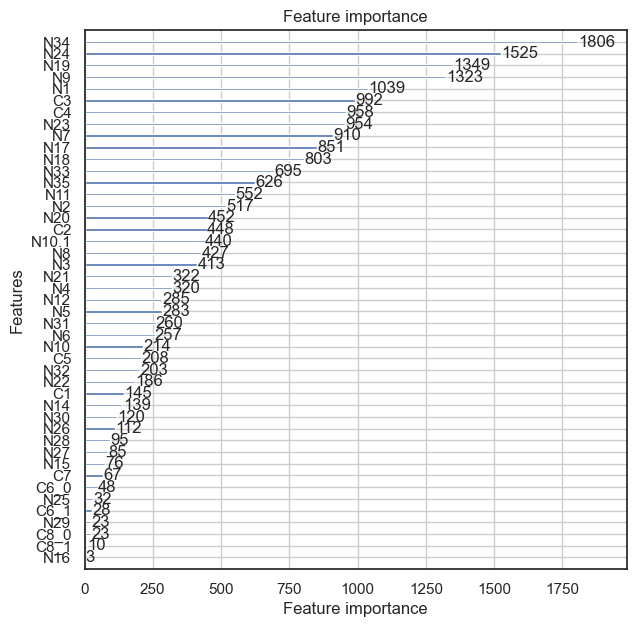

In [130]:
import lightgbm
lightgbm.plot_importance(lgbm_model,figsize=(7,7))

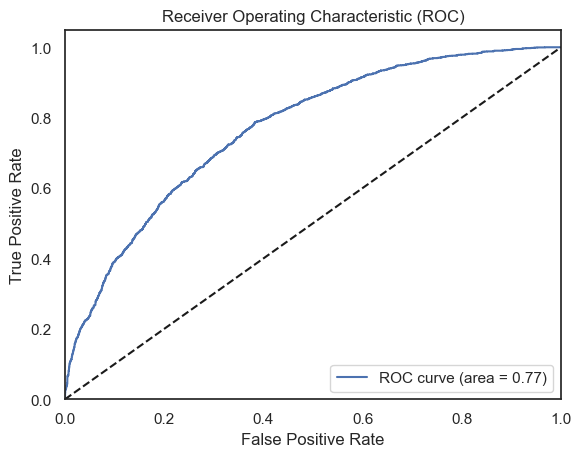

In [131]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_valid,  y_pred)
roc_auc = roc_auc_score(y_valid,  y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [132]:
#Predicting on test data 
test_pred = lgbm_model.predict_proba(X_test)[:,1]

In [133]:
# Predictions 
res = pd.DataFrame(test_pred)
Unique_ID = pd.DataFrame(ID)
res = res.rename(columns={res.columns[0]: 'Dependent_Variable'})
submission = pd.concat([ID,res], axis = 1)

submission.to_csv("final_predictions.csv",index = False)